<a href="https://colab.research.google.com/github/shaanompatel/Tensorflow-CIFAR-Object-Recognition/blob/main/Cifar_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
%tensorflow_version 2.x # specify that we want tensorflow v2
import tensorflow as tf # import main tensorflow library
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt # used to visualize the data
import numpy as np
%load_ext tensorboard
from datetime import datetime
from packaging import version
from tensorflow import keras
import os

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # specify that we want tensorflow v2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


**Bring in Data**

In [2]:
# Bring in and divide up the data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
 
# divide to create values that are from 0 to 1
train_images, test_images = train_images/255.0, test_images/255.0
 
# provide all of the labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
 
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

170500096/170498071 [==============================] - 4s 0us/step


**Optional: view an image**

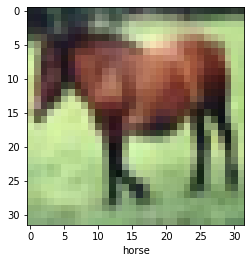

In [3]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images
 
plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Create CNN Architecture

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # creates first layer (32 filters that are 3x3)
model.add(layers.MaxPooling2D((2, 2))) # pooling reduces the shape of the data
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) #pooling reduces the shape of the data
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
 
model.summary() # let's see what the model looks like thus far

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**Put in dense layers**

In [5]:
model.add(layers.Flatten()) # flattens out the data into a single "line"
model.add(layers.Dense(64, activation='relu')) # adds an intermediate layer
model.add(layers.Dense(10)) # adds an output layer (100 for 100 different labels)
 
model.summary() # see the complete model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

**Training**

In [6]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
 
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
 
 
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
 
history = model.fit(train_images, train_labels, 
                  epochs=10,validation_data=(test_images, test_labels), 
                  callbacks=[cp_callback])

Epoch 1/10
1563/1563 [==============================] - 37s 4ms/step - loss: 1.5210 - accuracy: 0.4407 - val_loss: 1.2401 - val_accuracy: 0.5562

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1555 - accuracy: 0.5874 - val_loss: 1.1115 - val_accuracy: 0.6074

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0007 - accuracy: 0.6442 - val_loss: 1.0048 - val_accuracy: 0.6477

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9019 - accuracy: 0.6846 - val_loss: 0.9268 - val_accuracy: 0.6748

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8265 - accuracy: 0.7101 - val_loss: 0.9533 - val_accuracy: 0.6747

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
1563/1563 [============

**See how accurate the mode is**

In [7]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)
# uses the test data to determine the real-world accuracy

313/313 - 1s - loss: 0.8782 - accuracy: 0.7087
0.7087000012397766


**Process sample images**

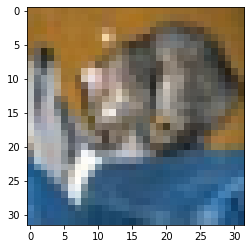

Expected: cat
Guess: cat


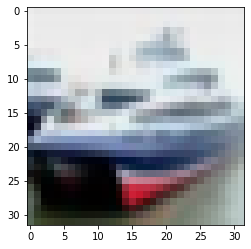

Expected: ship
Guess: ship


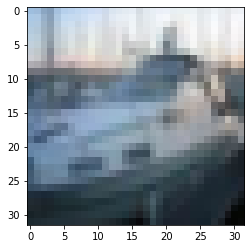

Expected: ship
Guess: ship


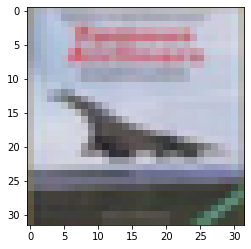

Expected: airplane
Guess: airplane


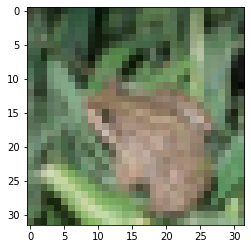

Expected: frog
Guess: frog


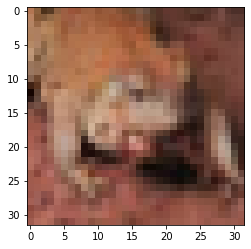

Expected: frog
Guess: frog


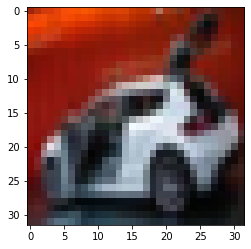

Expected: automobile
Guess: automobile


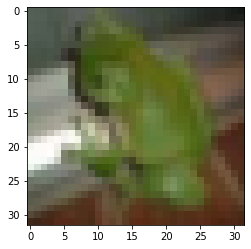

Expected: frog
Guess: frog


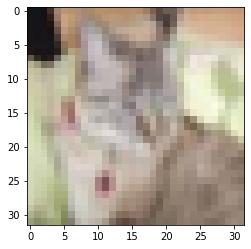

Expected: cat
Guess: cat


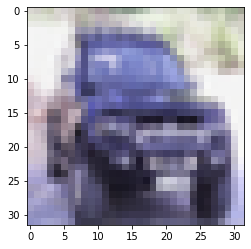

Expected: automobile
Guess: automobile


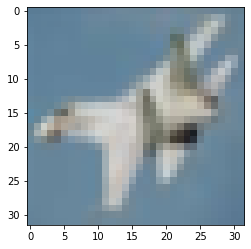

Expected: airplane
Guess: airplane


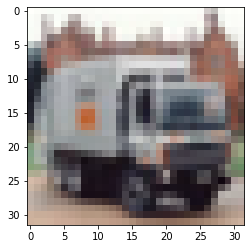

Expected: truck
Guess: truck


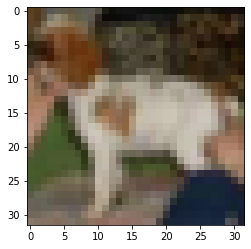

Expected: dog
Guess: deer


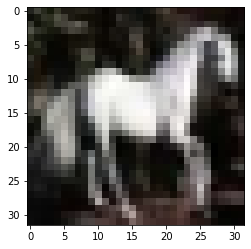

Expected: horse
Guess: horse


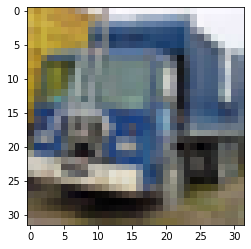

Expected: truck
Guess: truck


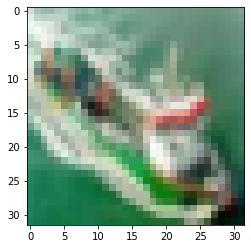

Expected: ship
Guess: ship


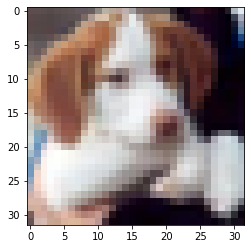

Expected: dog
Guess: dog


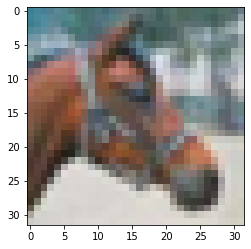

Expected: horse
Guess: horse


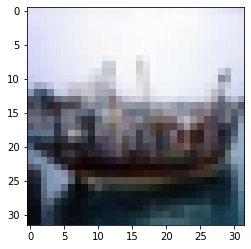

Expected: ship
Guess: ship


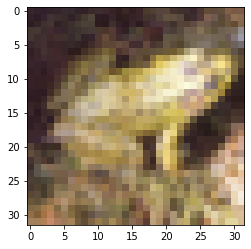

Expected: frog
Guess: frog


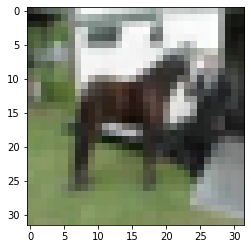

Expected: horse
Guess: horse


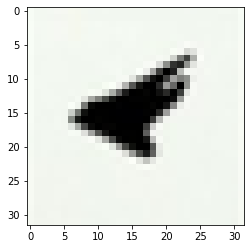

Expected: airplane
Guess: airplane


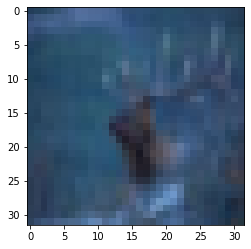

Expected: deer
Guess: deer


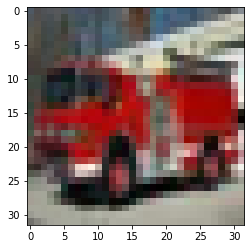

Expected: truck
Guess: truck


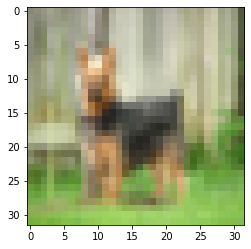

Expected: dog
Guess: deer


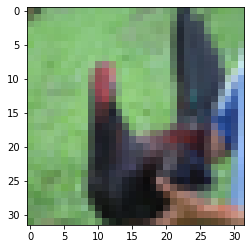

Expected: bird
Guess: truck


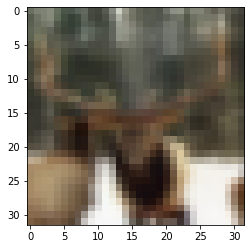

Expected: deer
Guess: deer


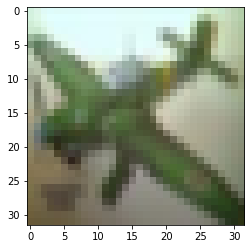

Expected: airplane
Guess: airplane


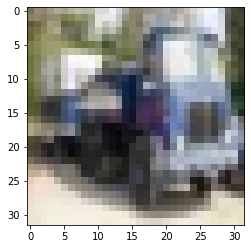

Expected: truck
Guess: truck


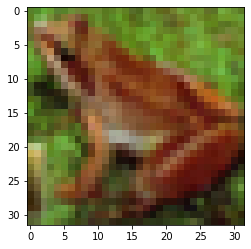

Expected: frog
Guess: frog


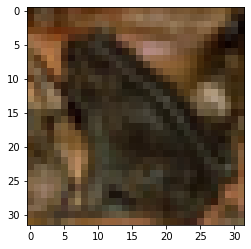

Expected: frog
Guess: frog


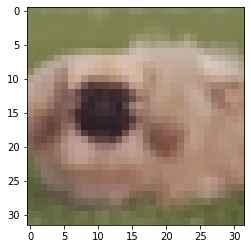

Expected: dog
Guess: dog


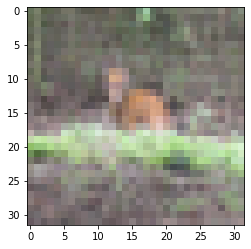

Expected: deer
Guess: bird


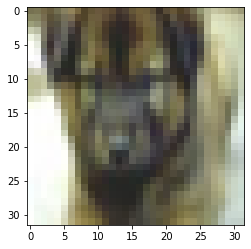

Expected: dog
Guess: cat


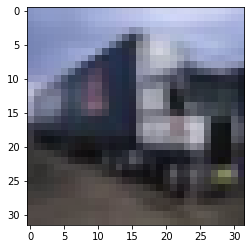

Expected: truck
Guess: truck


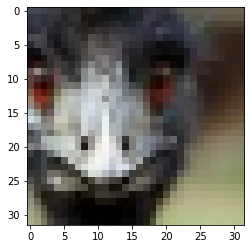

Expected: bird
Guess: cat


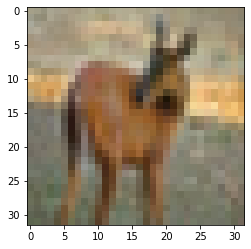

Expected: deer
Guess: horse


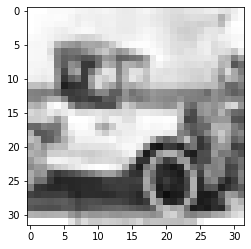

Expected: automobile
Guess: truck


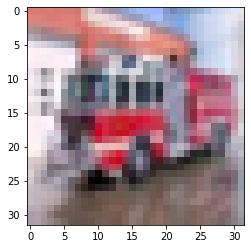

Expected: truck
Guess: truck


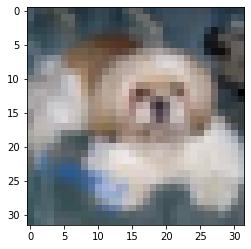

Expected: dog
Guess: dog


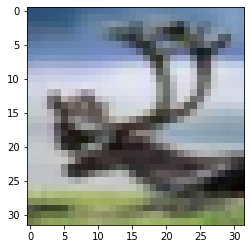

Expected: deer
Guess: deer


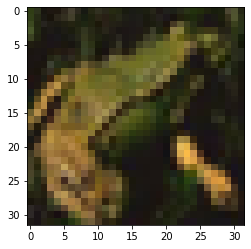

Expected: frog
Guess: frog


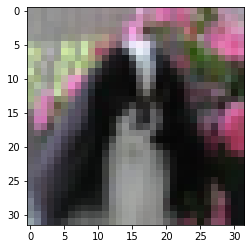

Expected: dog
Guess: dog


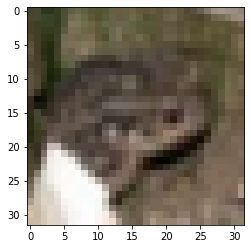

Expected: frog
Guess: frog


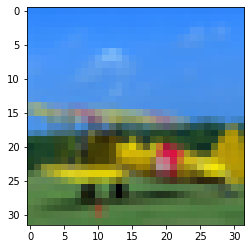

Expected: airplane
Guess: airplane


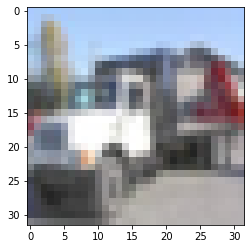

Expected: truck
Guess: truck


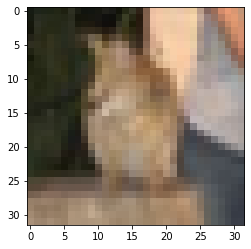

Expected: cat
Guess: cat


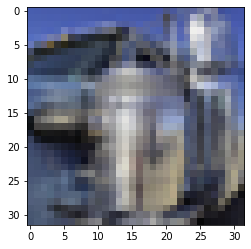

Expected: truck
Guess: dog


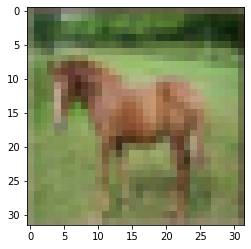

Expected: horse
Guess: horse


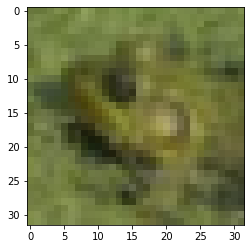

Expected: frog
Guess: frog


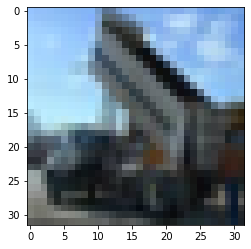

Expected: truck
Guess: truck


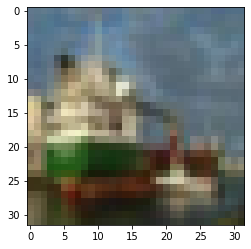

Expected: ship
Guess: ship


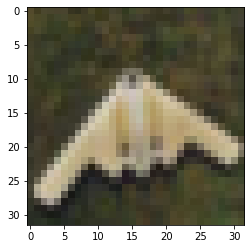

Expected: airplane
Guess: bird


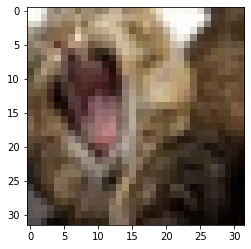

Expected: cat
Guess: cat


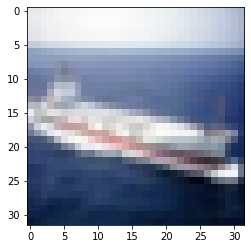

Expected: ship
Guess: ship


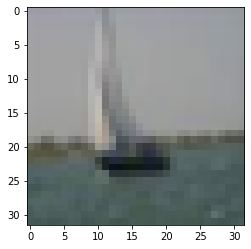

Expected: ship
Guess: ship


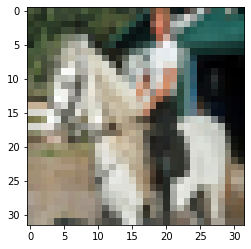

Expected: horse
Guess: horse


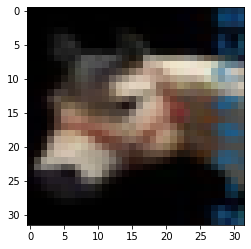

Expected: horse
Guess: cat


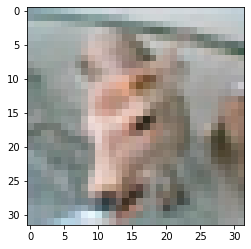

Expected: deer
Guess: frog


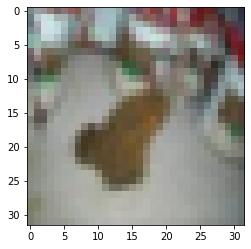

Expected: frog
Guess: cat


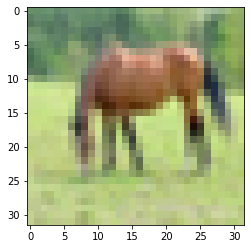

Expected: horse
Guess: horse


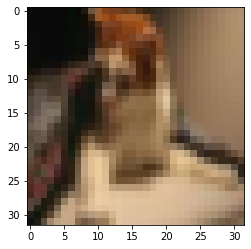

Expected: cat
Guess: cat


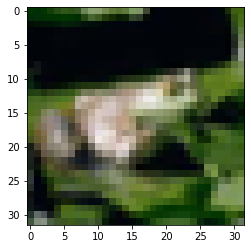

Expected: frog
Guess: frog


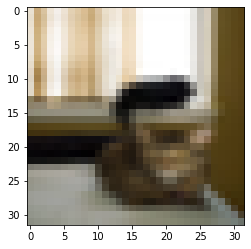

Expected: cat
Guess: cat


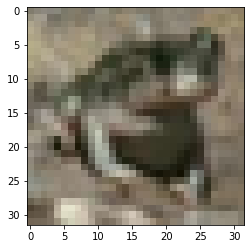

Expected: frog
Guess: frog


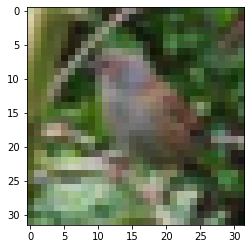

Expected: bird
Guess: bird


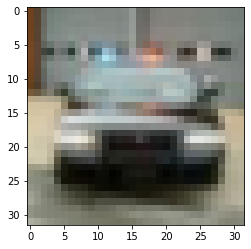

Expected: automobile
Guess: automobile


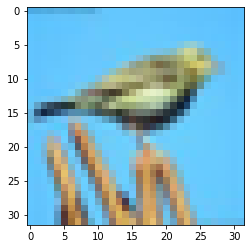

Expected: bird
Guess: bird


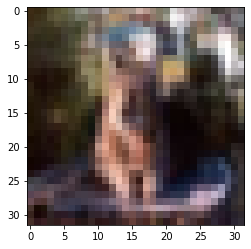

Expected: cat
Guess: horse


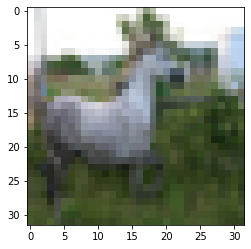

Expected: horse
Guess: bird


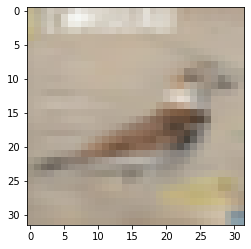

Expected: bird
Guess: bird


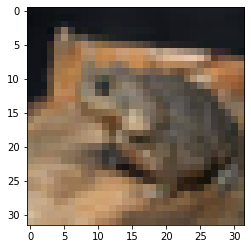

Expected: frog
Guess: cat


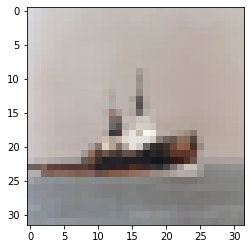

Expected: ship
Guess: ship


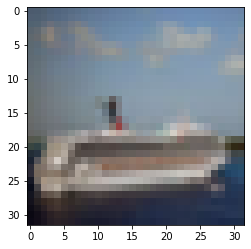

Expected: ship
Guess: ship


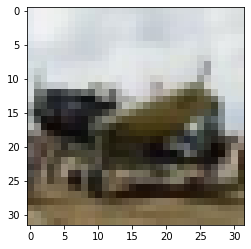

Expected: airplane
Guess: truck


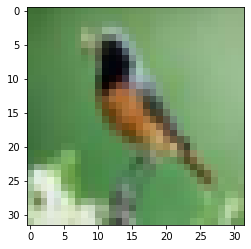

Expected: bird
Guess: bird


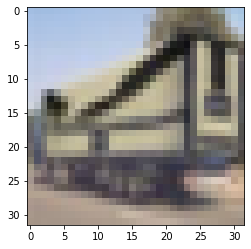

Expected: truck
Guess: truck


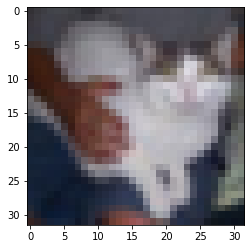

Expected: cat
Guess: cat


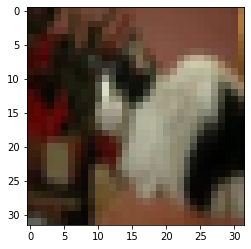

Expected: cat
Guess: cat


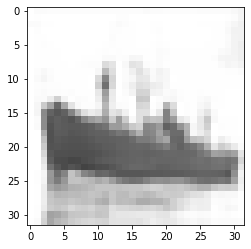

Expected: ship
Guess: ship


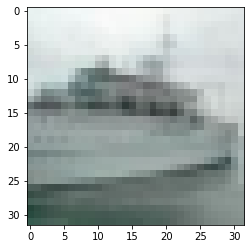

Expected: ship
Guess: ship


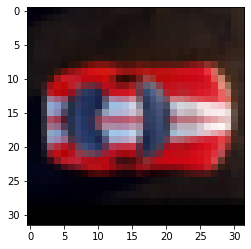

Expected: automobile
Guess: ship


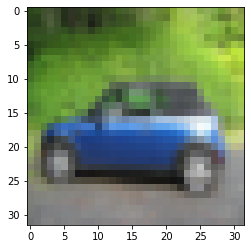

Expected: automobile
Guess: automobile


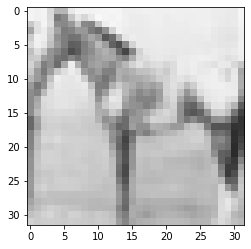

Expected: horse
Guess: horse


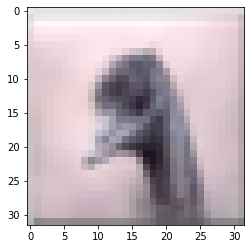

Expected: bird
Guess: bird


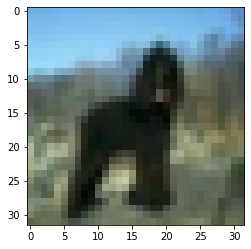

Expected: dog
Guess: horse


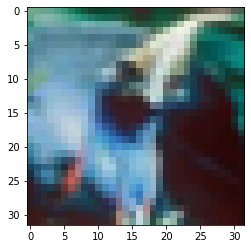

Expected: bird
Guess: bird


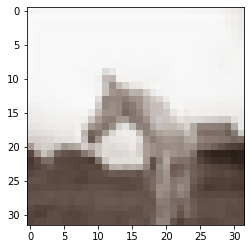

Expected: horse
Guess: horse


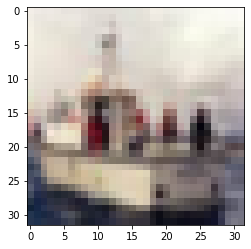

Expected: ship
Guess: ship


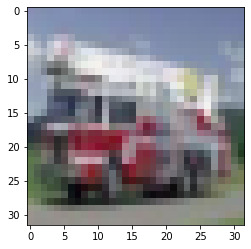

Expected: truck
Guess: truck


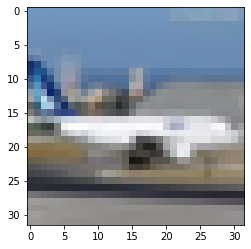

Expected: airplane
Guess: airplane


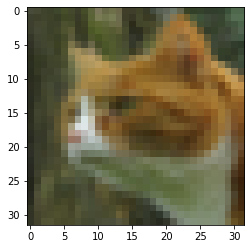

Expected: cat
Guess: frog


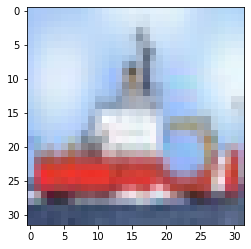

Expected: ship
Guess: ship


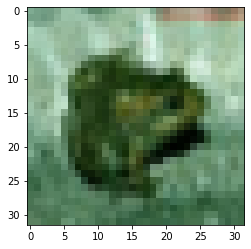

Expected: frog
Guess: frog


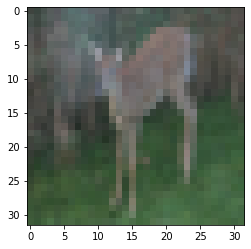

Expected: deer
Guess: deer


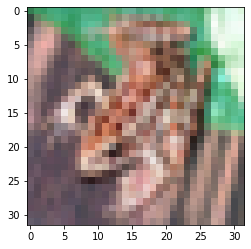

Expected: frog
Guess: frog


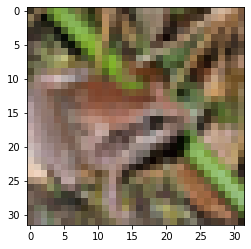

Expected: frog
Guess: frog


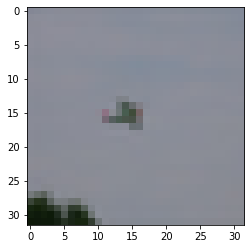

Expected: airplane
Guess: airplane


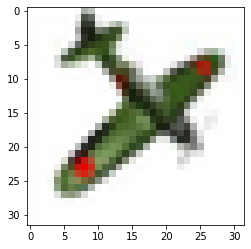

Expected: airplane
Guess: airplane


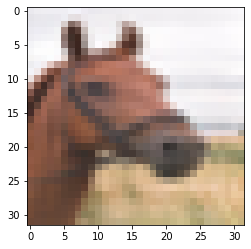

Expected: horse
Guess: airplane


In [8]:
 
 
for a in range (100):
  # change this number to test different images
  
  IMG_INDEX = a 
  # change this to look at other images
  plt.figure()
  plt.imshow(test_images[IMG_INDEX] ,cmap=plt.cm.binary)
  plt.show()
  # show specified image
  
  def convert_to_label(x):
    if x==0:
      return "airplane"
    if x==1:
      return "automobile"
    if x==2:
      return "bird"
    if x==3:
      return "cat"
    if x==4:
      return "deer"
    if x==5:
      return "dog"
    if x==6:
      return "frog"
    if x==7:
      return "horse"
    if x==8:
      return "ship"
    if x==9:
      return "truck"
  # function to convert output numbers into labels
 
  predictions = model.predict(test_images) 
  guess = convert_to_label((np.argmax(predictions[a])))
  answer = convert_to_label(test_labels[a])
  #defines what the guess and answer are
  
  
  print("Expected: "+ answer)
  print("Guess: "+ guess)
  #prints the aforementioned values